# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 1381 Исайкин Георгий Иванович и Петров Александр Сергеевич. Вариант №4.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

#### Дискретное преобразование Фурье (ДПФ)
Это математический метод, позволяющий преобразовать дискретный сигнал $x$ в его частотную компоненту, что позволяет анализировать его частотные характеристики. ДПФ определяется формулой
$$X(n)=\sum_{k=0}^{N-1}x_k\exp(-i\frac{2\pi n}Nk)$$
или
$$X(\omega)=\sum_{k=0}^{N-1}x_ke^{-i\omega k}$$
где $\omega=\frac{2\pi n}N$

#### Линейное сглаживание
Это фильтр, который преобразует входной сигнал $x$ в выходной $y$ по формуле
$$y_n=\frac1{2m+1}\sum_{k=-m}^{m}x_{n+k}$$

Передаточная функция имеет вид
$$H(\omega)=\frac1{2m+1}\left(1+\sum_{k=1}^m\cos(\omega k)\right)$$
где $N=2m+1$

#### Квадратичное (2-й степени) сглаживание
Это фильтр, который преобразует входной сигнал $x$ в выходной $y$ по формуле
$$y_n=\frac{\sum^m_{k=-m}x_{n+k}k^2 - \frac{3m^2+3m-1}5\sum_{k=-m}^mx_{n+k}}{\frac{m(m+1)(2m+1)}{3}-\frac{(3m^2+3m-1)(2m+1)}{5}}$$

Передаточная функция имеет вид
- для 5 точек
$$H(\omega)=\frac1{35}(17+24\cos(\omega)-6\cos(2\omega))$$
- для 9 точек
$$H(\omega)=\frac1{231}(59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega))$$

#### Сглаживание 4-й степени
Это фильтр, который преобразует входной сигнал $x$ в выходной $y$ по формуле
- для 7 точек
$$y_т=\frac1{231}(5x_{n-3}-30x_{n-2}+75_{n-1}+131x_n++75x_{n+1}-30x_{n+2}+5x_{n+3})$$
- для 11 точек
$$y_n=\frac1{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+\ldots +18x_{n+5})$$

Передаточная функция имеет вид
- для 7 точек
$$H(\omega)=\frac1{231}(131+150\cos(\omega)-60\cos(2\omega)+10\cos(3\omega))$$
- для 11 точек
$$H(\omega)=\frac1{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36cos(5\omega))$$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.fftpack import fft, fftfreq
from numpy.polynomial.polynomial import Polynomial
from scipy.signal import savgol_filter


### Задание 1
Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_kt+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя $32$ отсчета ($N=31$).

In [3]:
def signal(normalize=True):
    # Определяем значения переменных
    A = np.random.randint(1, 12, 11)
    if normalize:
        A = A / np.sum(A)
    omega = np.linspace(0, 1, 11) * np.pi
    phi = np.random.uniform(0, 0.5, 11)

    # Определяем функцию ряда
    f = lambda t: np.sum(A * np.cos(omega * t + phi))
    return f

def discrete(f):
    # Определяем временной ряд
    df = pd.DataFrame({'t': range(32)})

    # Определяем дискретные значения сигнала на ряду 
    df['s'] = df['t'].apply(f)
    return df

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

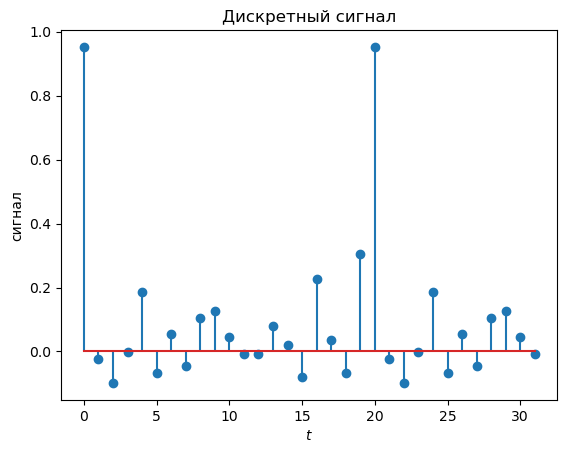

<Axes: title={'center': 'Аналоговый сигнал'}, xlabel='$t$', ylabel='сигнал'>

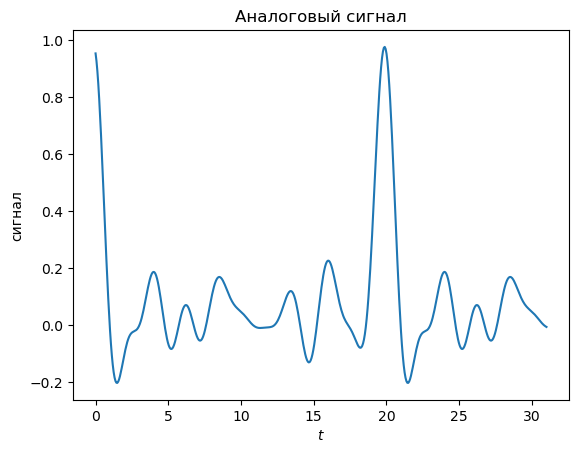

In [4]:
# Создаём функцию сигнала
f = signal()

# Формируем дискретный сигнал
df = discrete(f)

# Рисуем дискретный сигнал
plt.stem(df['t'], df['s'])
plt.xlabel('$t$')
plt.ylabel('сигнал')
plt.title('Дискретный сигнал')
plt.show()

# Определяем временной ряд
t = np.linspace(0, 31, 500)

# Рисуем аналоговый сигнал
plt.xlabel('$t$')
plt.ylabel('сигнал')
plt.title('Аналоговый сигнал')
sns.lineplot(x=t, y=map(f, t))


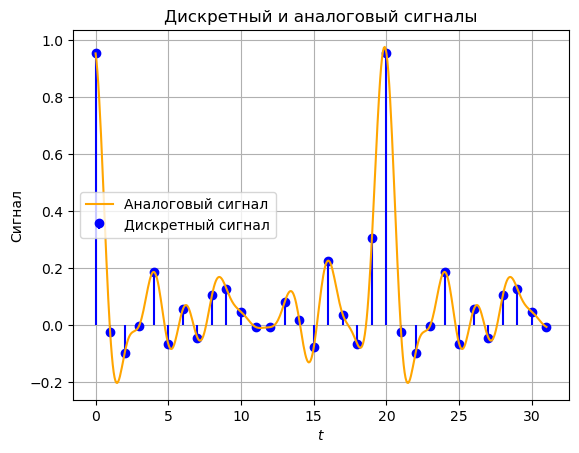

In [5]:
# Дискретный и аналоговый сигналы на одном графике

plt.stem(df['t'], df['s'], basefmt=" ", label='Дискретный сигнал', linefmt='b-', markerfmt='bo')
plt.plot(t, list(map(f, t)), label='Аналоговый сигнал', color='orange')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Дискретный и аналоговый сигналы')
plt.legend()
plt.grid()
plt.show()

### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


Преобразование фурье сигнала $s$ имеет вид
$$S(n)=\sum_{k=0}^{N-1}s_k\cdot\exp\left(-ik\frac{2\pi n}N\right)$$
или
$$S(\omega)=\sum_{k=0}^{N-1}s_k\cdot e^{-ik\omega}$$
где $\omega=\frac{2\pi n}N$

Воспользуемся второй формой что бы по ДПФ вычисляет отсчеты спектра дискретного сигнала по частоте <!-- 4 лекция 16 слайд -->



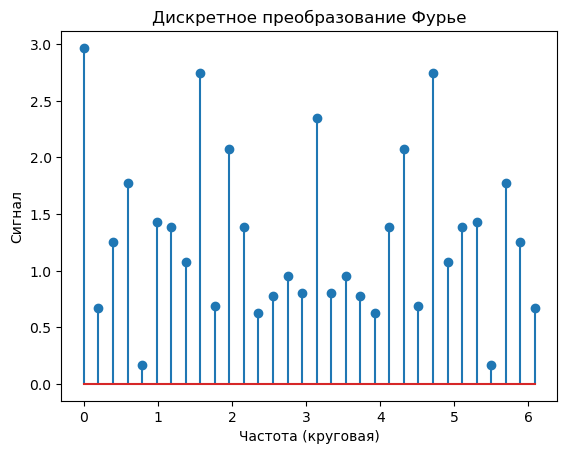

In [6]:
# Дискретное преобразование Фурье (ДПФ)
def furie(sig, n):
    return sum(sig[k] * np.exp(-1j * 2 * np.pi * n * k / 32) for k in range(32))
    
# Определение и подсчёт значений ДПФ
df['w'] = df['t'].apply(lambda n: 2 * np.pi * n / 32)
df['S'] = df['t'].apply(lambda n: furie(df['s'], n))

# Рисуем ДПФ
plt.stem(df['w'], np.abs(df['S']))
plt.xlabel('Частота (круговая)')
plt.ylabel('Сигнал')
plt.title('Дискретное преобразование Фурье')
plt.show()


### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание по $2m+1$ точкам происходит по формуле
$$y_n=\frac1{2m+1}\sum_{k=-m}^{m}x_{n+k}$$

Формула передаточной функции для линейного сглаживания по $2m+1$ точкам имеет вид
$$H(\omega)=\frac1{2m+1}\left(1+\sum_{k=1}^m\cos(\omega k)\right)$$

Или $$𝐻(\omega)=\frac{sin(\frac{𝑁\omega}{2})}{Nsin⁡(\frac{\omega}{2})}$$
где $N=2m+1$

In [7]:
# Реализация линейного сглаживания
def linear_smoothing(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

# Сглаживание по 5 и 9 точкам
df['y5'] = linear_smoothing(df['s'], 5)
df['y9'] = linear_smoothing(df['s'], 9)


### Задание 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

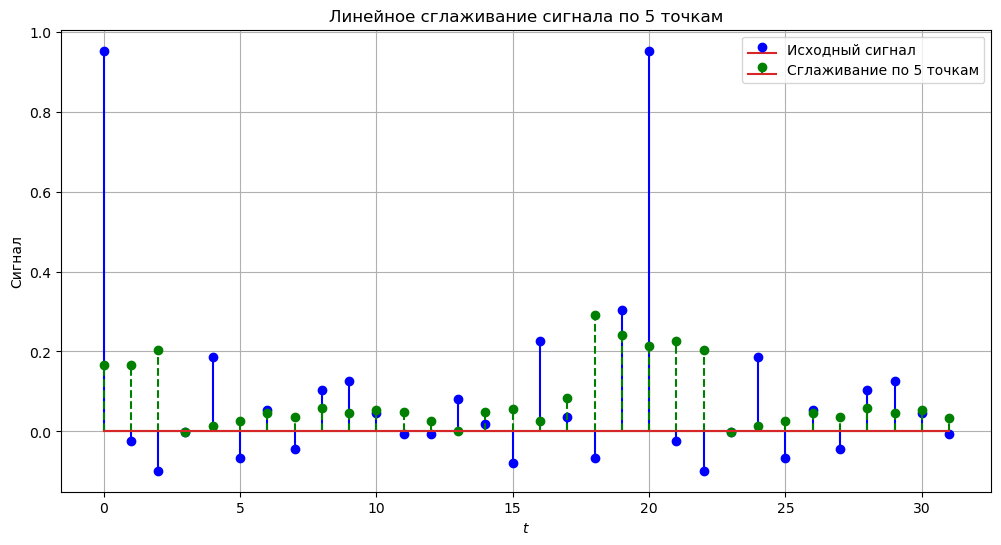

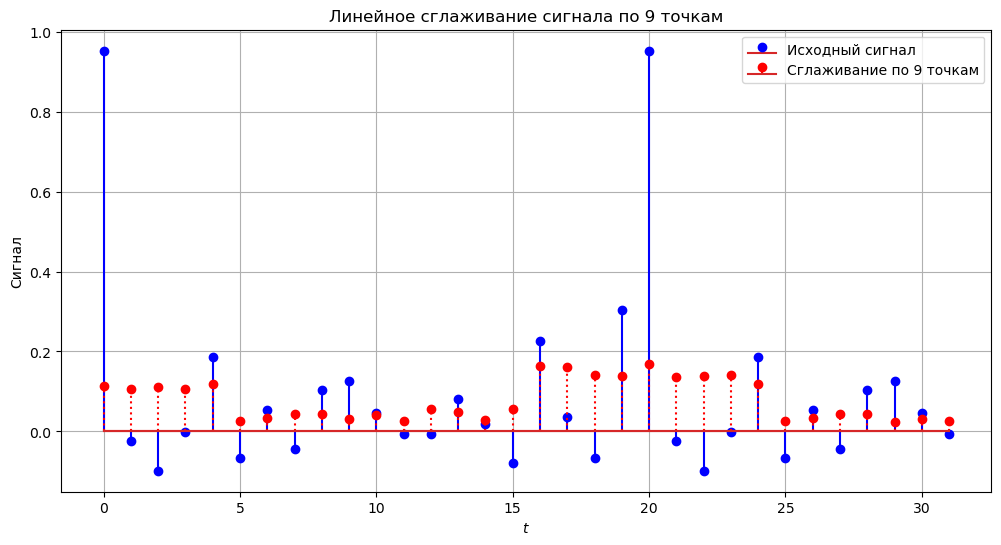

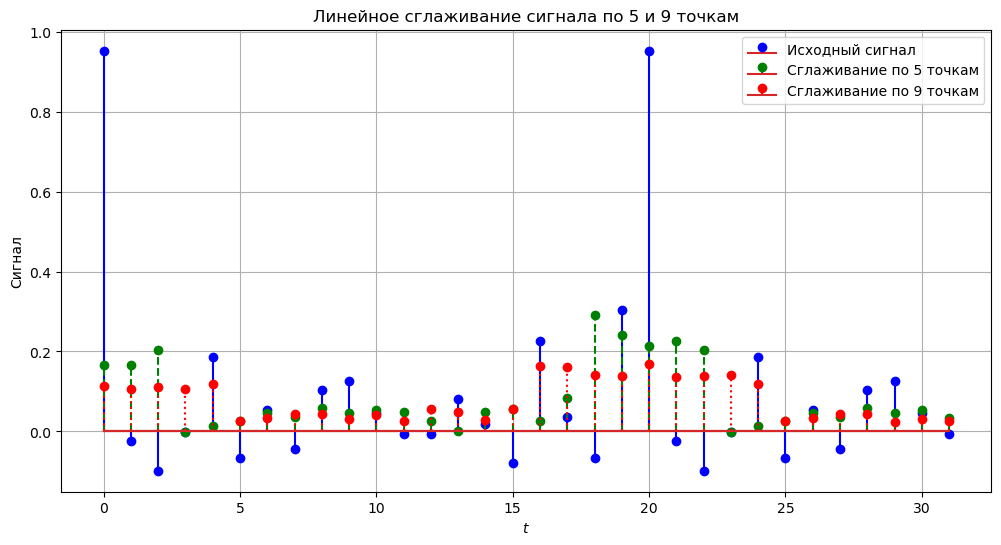

In [8]:
# Графики: линейное сглаживание по 5 точкам и график исходного сигнала 

plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['y5'], label="Сглаживание по 5 точкам", linefmt='g--', markerfmt='go')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Линейное сглаживание сигнала по 5 точкам')
plt.legend()
plt.grid()
plt.show()

# Графики: линейное сглаживание по 9 точкам и график исходного сигнала 

plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['y9'], label="Сглаживание по 9 точкам", linefmt='r:', markerfmt='ro')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Линейное сглаживание сигнала по 9 точкам')
plt.legend()
plt.grid()
plt.show()

# Графики: линейное сглаживание по 5 и по 9 точкам и график исходного сигнала 

plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['y5'], label="Сглаживание по 5 точкам", linefmt='g--', markerfmt='go')
plt.stem(df['t'], df['y9'], label="Сглаживание по 9 точкам", linefmt='r:', markerfmt='ro')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Линейное сглаживание сигнала по 5 и 9 точкам')
plt.legend()
plt.grid()
plt.show()

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

ДПФ высчитывается алогично 4 заданию

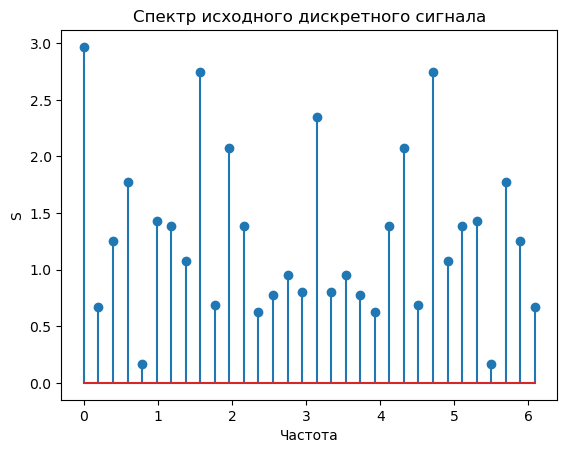

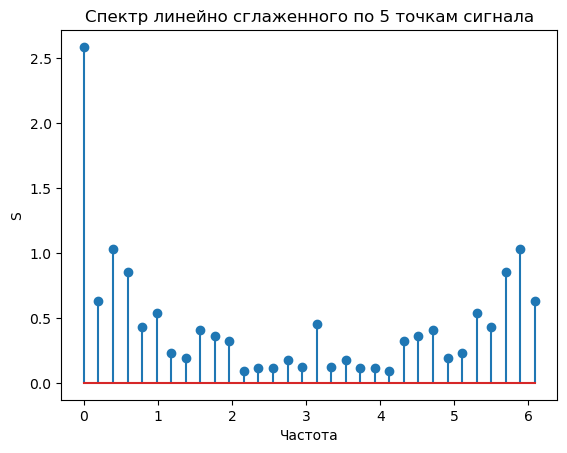

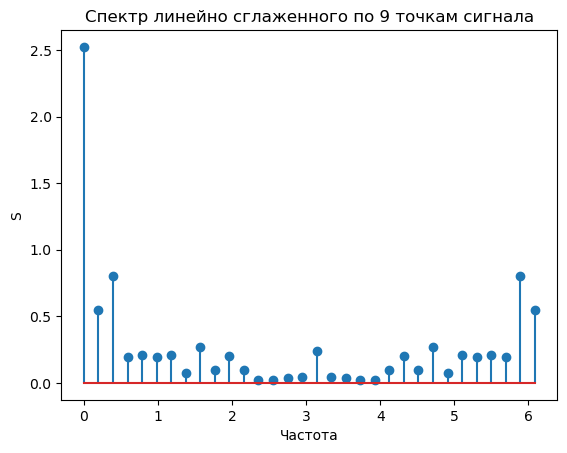

In [9]:
# ДПФ для сглаженного сигнала (5 точек)
df['Y5'] = df['t'].apply(lambda n: furie(df['y5'], n))

# ДПФ для сглаженного сигнала (9 точек)
df['Y9'] = df['t'].apply(lambda n: furie(df['y9'], n))

#Спектр исходного сигнала
plt.stem(df['w'], np.abs(df['S']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр исходного дискретного сигнала')
plt.show()

#Спектр линейного сглаживания по 5 точкам
plt.stem(df['w'], np.abs(df['Y5']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр линейно сглаженного по 5 точкам сигнала')
plt.show()

#Спектр линейного сглаживания по 9 точкам
plt.stem(df['w'], np.abs(df['Y9']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр линейно сглаженного по 9 точкам сигнала')
plt.show()

### Задание 7

Проанализировать результат на соответствие значениям $H({\omega})$. Сделать выводы.

#### Анализ результатов фильтрации и соответствия значениям $H(\omega)$

1. Передаточная функция фильтров:

* Передаточная функция $H(\omega)$ описывает поведение фильтра в частотной области. Для линейного сглаживания формула $𝐻(\omega)=\frac{sin(\frac{𝑁\omega}{2})}{Nsin⁡(\frac{\omega}{2})}$ показывает, что фильтр подавляет определенные частотные компоненты в зависимости от количества узлов сглаживания 𝑁.

* Чем больше узлов, тем сильнее подавление высокочастотных составляющих.


2. Результаты спектрального анализа:

* После применения фильтров спектры показывают заметное снижение высокочастотных составляющих.

* Полиномы более низкой степени (2-го порядка) менее агрессивно подавляют высокочастотные компоненты по сравнению с полиномами 4-го порядка.

* Сглаживание на основе полиномов с большим количеством узлов (9 или 11) приводит к более сильному снижению спектральных амплитуд на высоких частотах.


3. Соответствие спектров фильтрованных сигналов передаточной функции $H(\omega)$:

* Теоретические ожидания совпадают с результатами ДПФ: снижение амплитуды высоких частот прямо пропорционально количеству узлов N.

* Наблюдается сохранение низкочастотных составляющих, что соответствует пропусканию основной полезной части сигнала.


4. Вывод:

* Полиномиальные фильтры эффективно подавляют высокочастотные шумы, не оказывая значительного влияния на низкочастотные компоненты.

* Поведение фильтров согласуется с теоретической передаточной функцией $H(\omega)$, что подтверждает правильность их реализации.



### Задание 8

Повторить п. 4–7 для следующих фильтров:
* a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
* b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

#### Сглаживание полиномом 2-ой степени по 5 и 9 узлам
Квадратичное сглаживание по $2m+1$ точкам происходит по формуле
$$y_n=\frac{\sum^m_{k=-m}x_{n+k}k^2 - \frac{3m^2+3m-1}5\sum_{k=-m}^mx_{n+k}}{\frac{m(m+1)(2m+1)}{3}-\frac{(3m^2+3m-1)(2m+1)}{5}}$$

Формула передаточной функции для квадратичного сглаживания имеет вид:
- для 5 точек
$$H(\omega)=\frac1{35}(17+24\cos(\omega)-6\cos(2\omega))$$
- для 9 точек
$$H(\omega)=\frac1{231}(59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega))$$

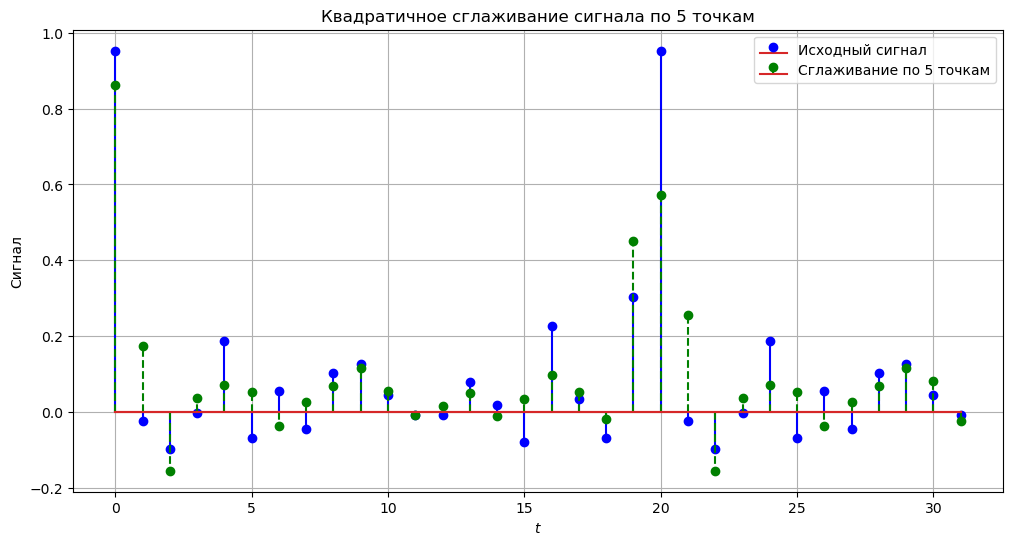

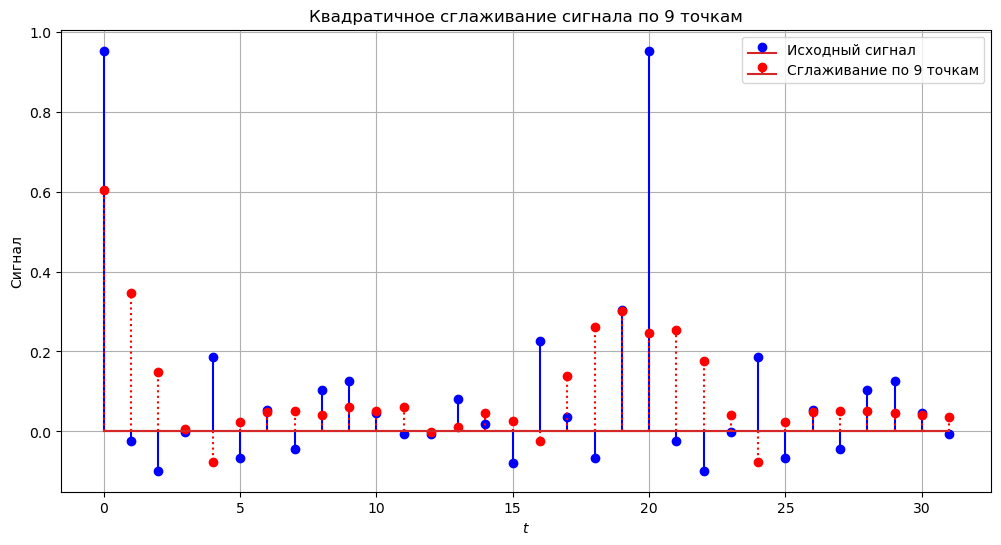

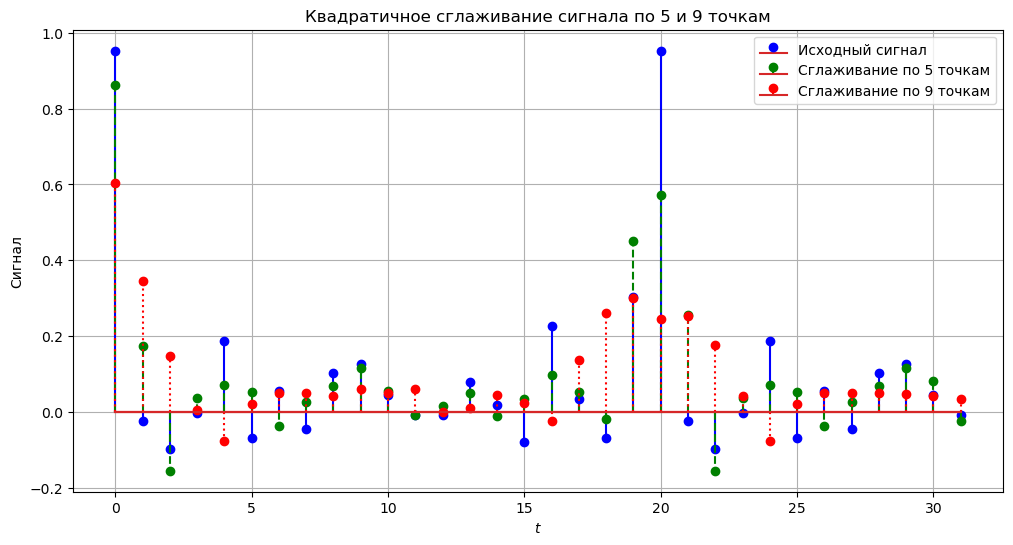

In [10]:
# Сглаживание полиномом второй степени по 5 и 9 узлам

df['2y5'] = savgol_filter(df['s'].values, 5, 2)
df['2y9'] = savgol_filter(df['s'].values, 9, 2)

#Графики исходного сигнала и сглаженного полиномом второй степени по 5 точкам.

plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['2y5'], label="Сглаживание по 5 точкам", linefmt='g--', markerfmt='go')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Квадратичное сглаживание сигнала по 5 точкам')
plt.legend()
plt.grid()
plt.show()

# Графики: квадратичное сглаживание по 9 точкам и график исходного сигнала 

plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['2y9'], label="Сглаживание по 9 точкам", linefmt='r:', markerfmt='ro')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Квадратичное сглаживание сигнала по 9 точкам')
plt.legend()
plt.grid()
plt.show()

# Графики: квадратичное сглаживание по 5 и по 9 точкам и график исходного сигнала 

plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['2y5'], label="Сглаживание по 5 точкам", linefmt='g--', markerfmt='go')
plt.stem(df['t'], df['2y9'], label="Сглаживание по 9 точкам", linefmt='r:', markerfmt='ro')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Квадратичное сглаживание сигнала по 5 и 9 точкам')
plt.legend()
plt.grid()
plt.show()

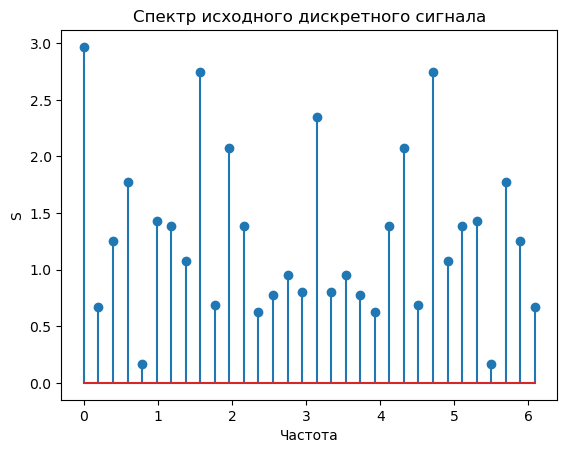

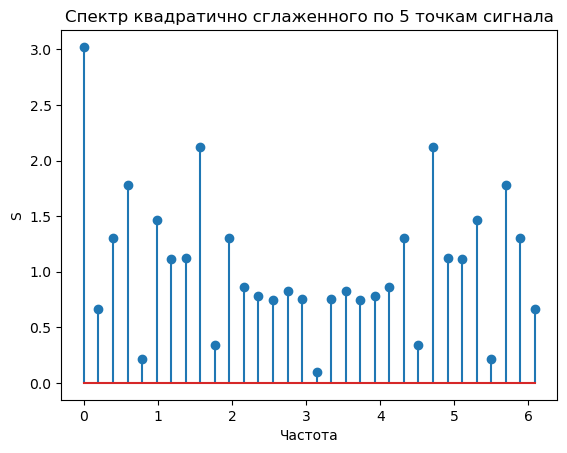

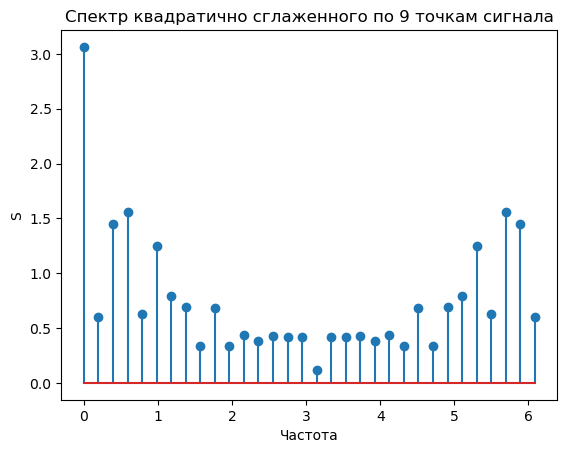

In [15]:
# ДПФ для сглаженного квадратичного сигнала (5 точек)
df['2Y5'] = df['t'].apply(lambda n: furie(df['2y5'], n))

# ДПФ для сглаженного квадратичного сигнала (9 точек)
df['2Y9'] = df['t'].apply(lambda n: furie(df['2y9'], n))

#Спектр исходного сигнала
plt.stem(df['w'], np.abs(df['S']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр исходного дискретного сигнала')
plt.show()

#Спектр квадратичного сглаживания по 5 точкам
plt.stem(df['w'], np.abs(df['2Y5']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр квадратично сглаженного по 5 точкам сигнала')
plt.show()

#Спектр квадратичного сглаживания по 9 точкам
plt.stem(df['w'], np.abs(df['2Y9']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр квадратично сглаженного по 9 точкам сигнала')
plt.show()

#### Сглаживание полиномом 4-ой степени по 7 и 11 узлам
Сглаживание 4-й степени происходит по формуле:
- для 7 точек
$$y_т=\frac1{231}(5x_{n-3}-30x_{n-2}+75_{n-1}+131x_n++75x_{n+1}-30x_{n+2}+5x_{n+3})$$
- для 11 точек
$$y_n=\frac1{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+\ldots +18x_{n+5})$$

Формула передаточной функции для сглаживания 4-й степени имеет вид:
- для 7 точек
$$H(\omega)=\frac1{231}(131+150\cos(\omega)-60\cos(2\omega)+10\cos(3\omega))$$
- для 11 точек
$$H(\omega)=\frac1{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36cos(5\omega))$$

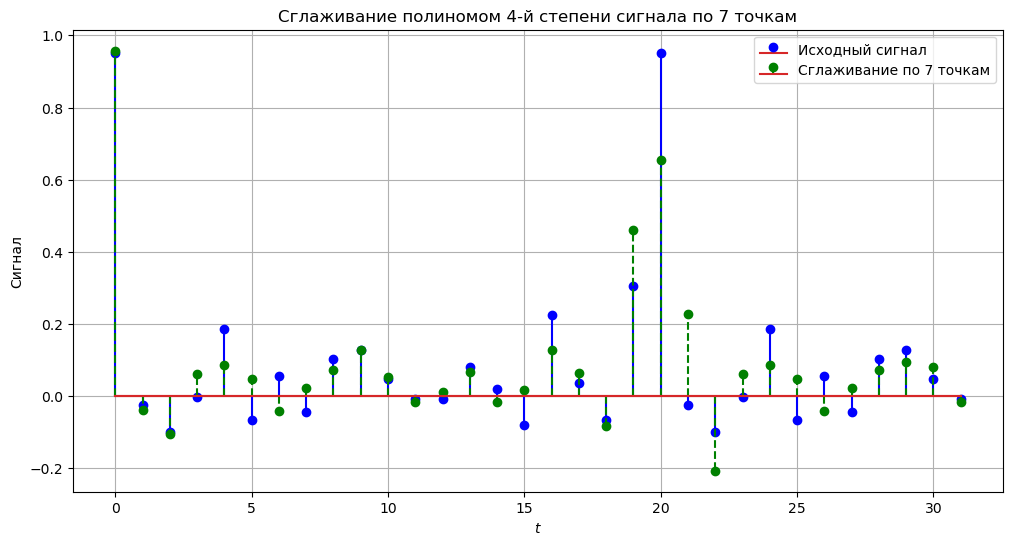

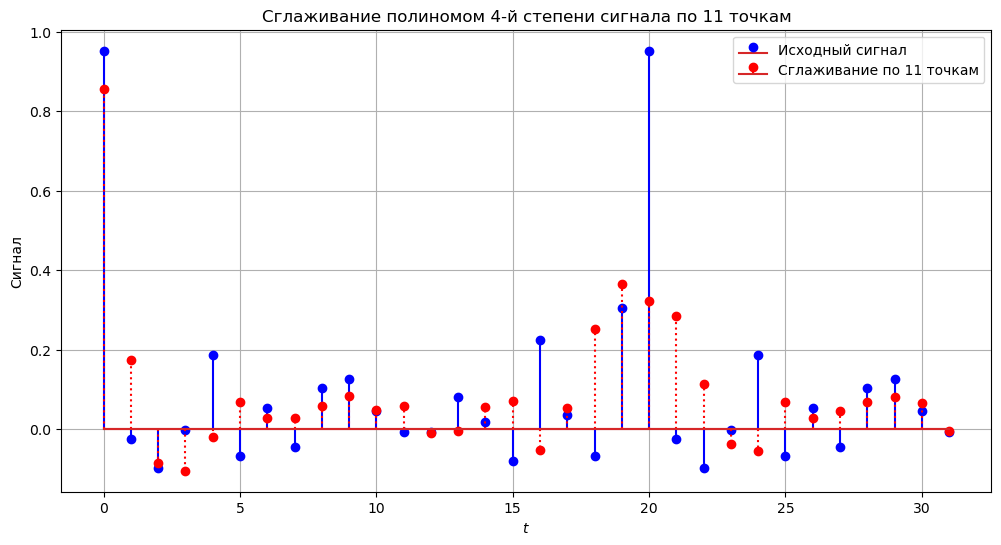

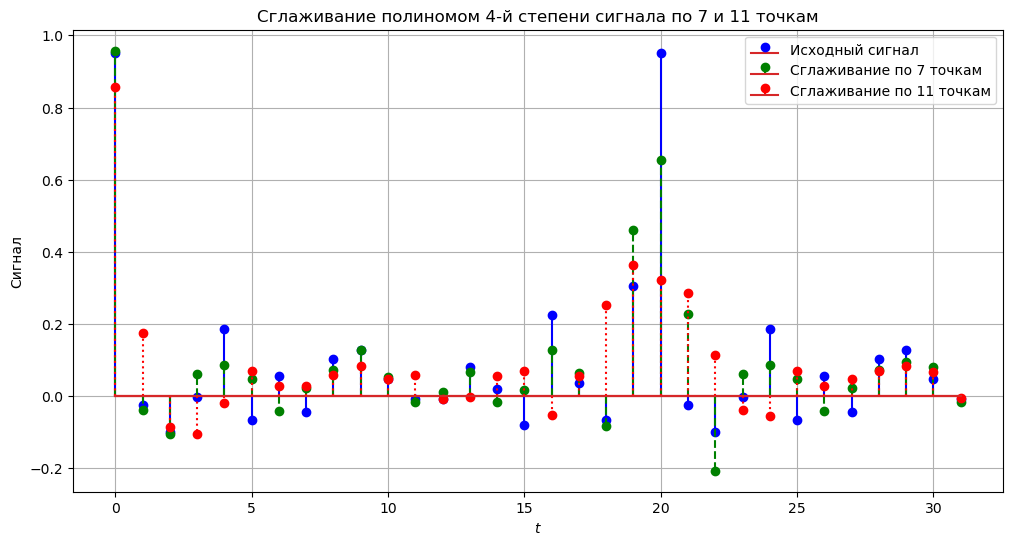

In [12]:
# Сглаживание полиномом четвертой степени по 7 и 11 узлам

df['4y7'] = savgol_filter(df['s'].values, 7, 4)
df['4y11'] = savgol_filter(df['s'].values, 11, 4)

#Графики исходного сигнала и сглаженного полиномом четвертой степени по 7 точкам.

plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['4y7'], label="Сглаживание по 7 точкам", linefmt='g--', markerfmt='go')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Сглаживание полиномом 4-й степени сигнала по 7 точкам')
plt.legend()
plt.grid()
plt.show()

# Графики: сглаживание полиномом четвертой степени по 11 точкам и график исходного сигнала 

plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['4y11'], label="Сглаживание по 11 точкам", linefmt='r:', markerfmt='ro')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Сглаживание полиномом 4-й степени сигнала по 11 точкам')
plt.legend()
plt.grid()
plt.show()

# Графики: сглаживание полиномом четвертой степени по 7 и по 11 точкам и график исходного сигнала 

plt.figure(figsize=(12, 6))
plt.stem(df['t'], df['s'], label="Исходный сигнал", linefmt='b-', markerfmt='bo')
plt.stem(df['t'], df['4y7'], label="Сглаживание по 7 точкам", linefmt='g--', markerfmt='go')
plt.stem(df['t'], df['4y11'], label="Сглаживание по 11 точкам", linefmt='r:', markerfmt='ro')
plt.xlabel('$t$')
plt.ylabel('Сигнал')
plt.title('Сглаживание полиномом 4-й степени сигнала по 7 и 11 точкам')
plt.legend()
plt.grid()
plt.show()

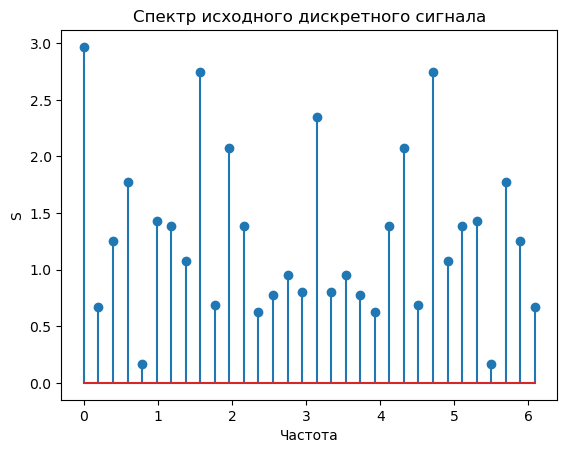

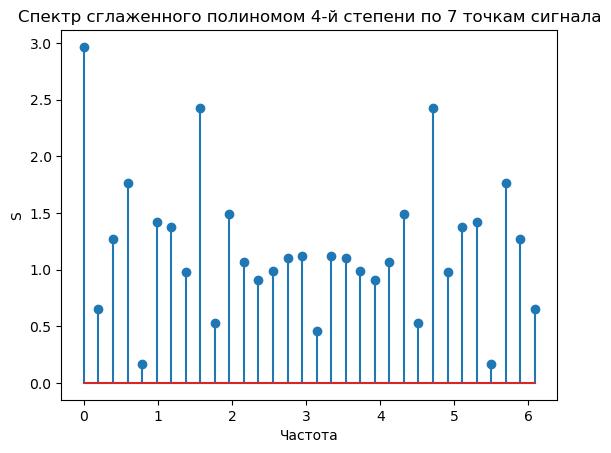

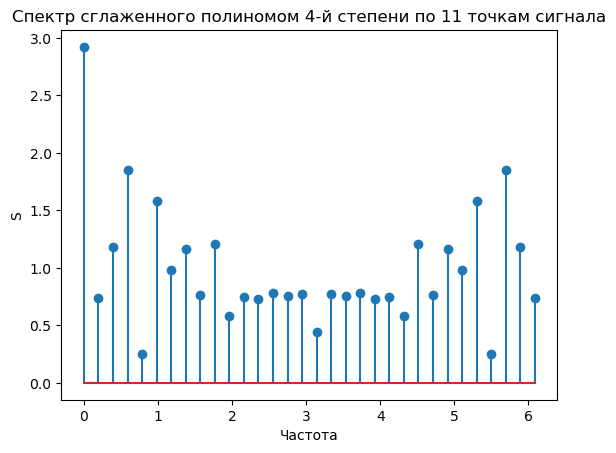

In [14]:
# ДПФ для сглаженного 4-й степени сигнала (7 точек)
df['4Y7'] = df['t'].apply(lambda n: furie(df['4y7'], n))

# ДПФ для сглаженного 4-й степени сигнала (11 точек)
df['4Y11'] = df['t'].apply(lambda n: furie(df['4y11'], n))

#Спектр исходного сигнала
plt.stem(df['w'], np.abs(df['S']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр исходного дискретного сигнала')
plt.show()

#Спектр сглаживания полиномом 4-й степени по 7 точкам
plt.stem(df['w'], np.abs(df['4Y7']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр сглаженного полиномом 4-й степени по 7 точкам сигнала')
plt.show()

#Спектр сглаживания полиномом 4-й степени по 11 точкам
plt.stem(df['w'], np.abs(df['4Y11']))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр сглаженного полиномом 4-й степени по 11 точкам сигнала')
plt.show()

## Выводы

#### Итоговая интерпретация и выводы

1. Эффективность полиномиальных фильтров:

* Сглаживание полиномами 2-го порядка более мягкое, оно лучше подходит для задач, где важно сохранить максимум спектра исходного сигнала.

* Полиномы 4-го порядка обеспечивают сильное подавление высокочастотных составляющих, что может быть полезно для удаления значительных шумов, но приводит к большей потере деталей сигнала.


2. Влияние количества узлов:

* Сглаживание по 5 или 7 узлам сглаживает сигнал умеренно, сохраняя больше его исходных характеристик.

* Увеличение количества узлов до 9 или 11 делает сигнал значительно более сглаженным, но может привести к чрезмерному удалению деталей.


3. Практическая интерпретация:

* Полиномиальные фильтры хорошо подходят для предварительной обработки сигналов перед их дальнейшим анализом, например, для устранения шума в данных.

* Для сигналов, содержащих много полезной информации в высокочастотной области, предпочтительнее использовать фильтры с меньшим количеством узлов и полиномы более низкой степени.


4. Сравнение фильтров:

* Сглаживание полиномами 2-го порядка обеспечивает более плавное подавление высоких частот, сохраняя общий характер сигнала.
 Полиномы 4-го порядка с большим количеством узлов приводят к большей фильтрации, что полезно в задачах сильного шумоподавления.

5. Заключение: 

Выбор параметров фильтрации (степень полинома и количество узлов) зависит от задачи. Например:

* Если нужно минимально искажать сигнал — подходят фильтры 2-го порядка с меньшим числом узлов.

* Если нужно максимально подавить шумы — фильтры 4-го порядка с большим количеством узлов.